In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from GNS import GradientNoiseScale

from models import DiT_S_2
from torch import Tensor
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms as T
from diffusion import create_diffusion

from typing import Optional, List

### ImageNet Data

Data-Path: ./data
Device: cpu
Dataset: 50000 Images
Image Shape: (3, 256, 256)


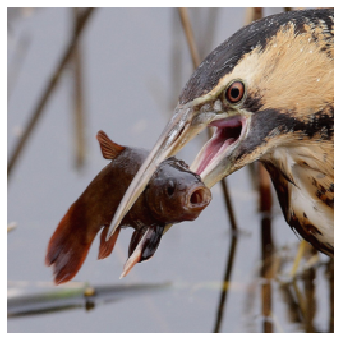

In [2]:
PATH = "./data"
B_SIZE = 64
IMG_DIM = (3, 256, 256)
TRANSFORM = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor()
])
device = "cuda" if torch.cuda.is_available() else "cpu"
dataset = ImageFolder(PATH, transform=TRANSFORM)
img, trgt = dataset[10]

print(f"Data-Path: {PATH}")
print(f"Device: {device}")
print(f"Dataset: {len(dataset)} Images")
print(f"Image Shape: {tuple(img.shape)}")

plt.figure(figsize=(6, 6))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.show()

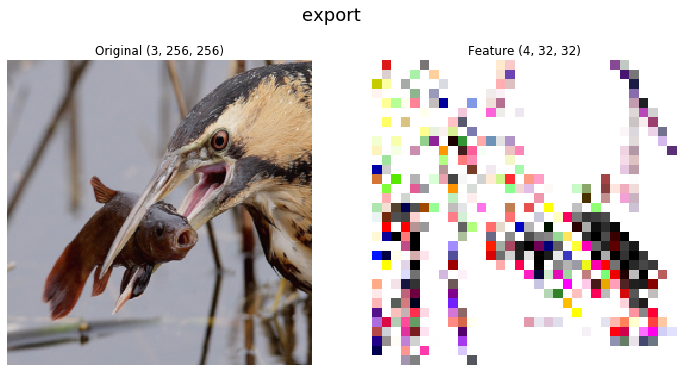

In [3]:
def show_feature(img_no: int):    
    dataset = ImageFolder("./data", transform=T.Compose([T.Resize((256, 256)), T.ToTensor()]))
    idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}
    img, trgt = dataset[img_no]
    label = idx_to_class[trgt]
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"{label}", fontsize=18)
    
    ## Original image
    plt.subplot(1, 2, 1)
    plt.title(f"Original {tuple(img.shape)}", fontsize=12)
    plt.imshow(img.permute(1, 2, 0))
    plt.axis("off")
    
    ## Latent feature
    arr = np.load(f"./features/imagenet256_features/{img_no}.npy")
    arr = np.clip(arr.squeeze(0), 0, 1)
    plt.subplot(1, 2, 2)
    plt.title(f"Feature {arr.shape}", fontsize=12)
    plt.imshow(arr.transpose(1, 2, 0))
    plt.axis("off")
    plt.show()
    

show_feature(10)